# 1. Install Dependencies and Setup


In [1]:
%pip install tensorflow opencv-python matplotlib

  Using cached matplotlib-3.8.4-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.8.4-cp311-cp311-win_amd64.whl (7.7 MB)
Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl (188 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip list

Package                      Version
---------------------------- --------
absl-py                      2.1.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.6.6
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  24.3.25
fonttools                    4.51.0
gast                         0.5.4
google-pasta                 0.2.0
grpcio                       1.62.2
h5py                         3.11.0
idna                         3.7
ipykernel                    6.22.0
ipython                      8.12.0
jedi                         0.18.2
joblib                       1.4.0
jupyter_client               8.1.0
jupyter_core                 5.3.0
keras

In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

2. Image cleaning

In [6]:
%pip install opencv-python
import cv2
import imghdr

Note: you may need to restart the kernel to use updated packages.


C:\Users\willi\AppData\Local\Temp\ipykernel_19932\1498754011.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data'

3. Load Data

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

NotFoundError: Could not find directory data

In [13]:
data_iterator = data.as_numpy_iterator()

NameError: name 'data' is not defined

In [14]:
batch = data_iterator.next()

NameError: name 'data_iterator' is not defined

NameError: name 'batch' is not defined

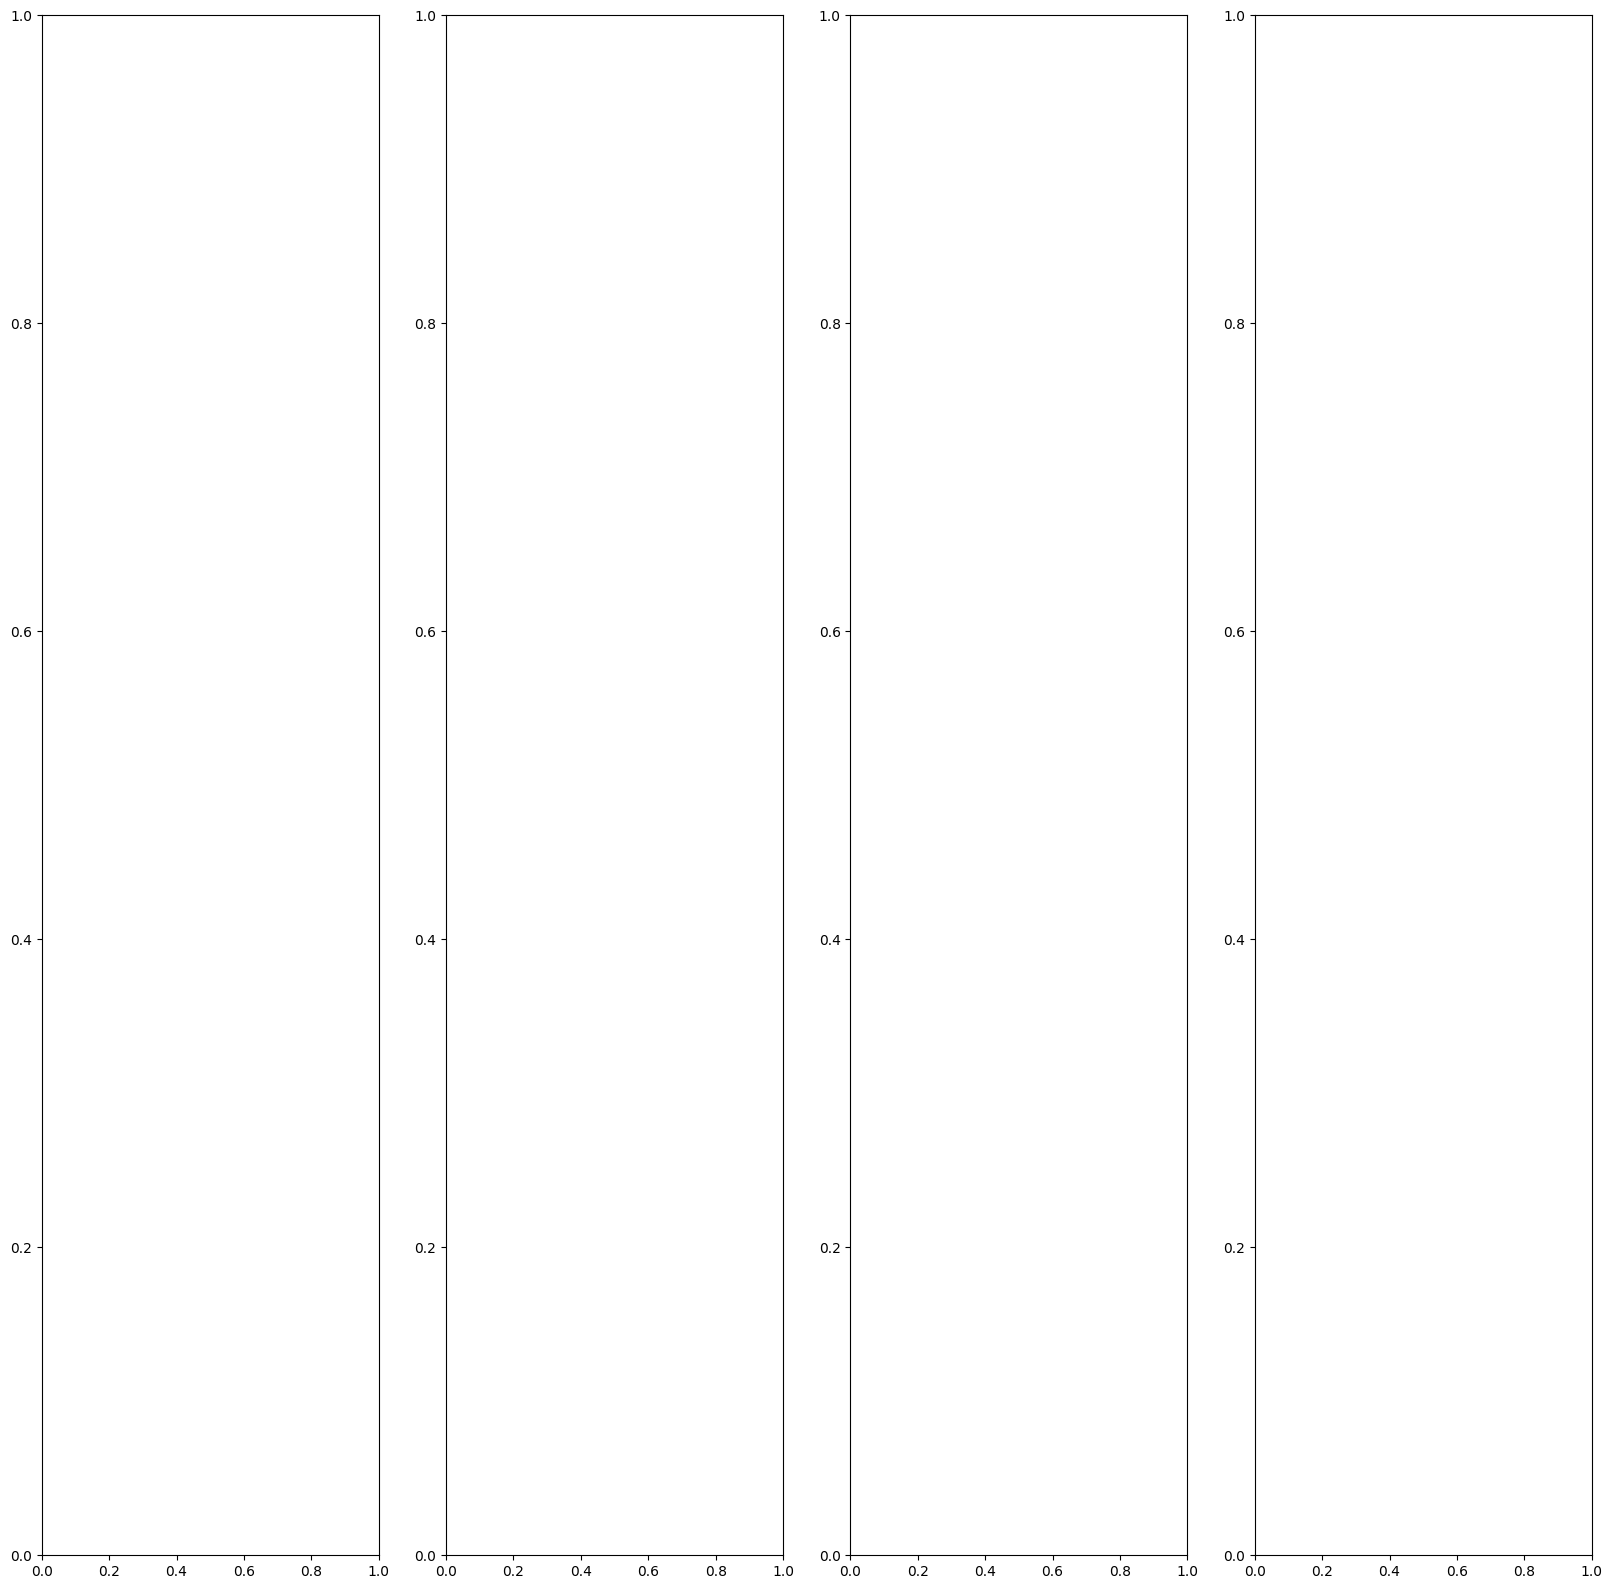

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

4. data scaling

In [16]:
data = data.map(lambda x,y: (x/255, y))

NameError: name 'data' is not defined

In [ ]:
data.as_numpy_iterator().next()

5. Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

6. build model

In [ ]:
train

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

7. training

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks= [tensorboard_callback])

8. plot performance

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

9. evaluate performance

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

10. test

In [ ]:
import cv2

In [ ]:
img=cv2.imread("INSERT EXAMPLE HERE")
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

11. save model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))